In [13]:
import pandas as pd
import os

In [14]:
path='D:\\CDS503\\Assignment 2\\Data'
os.chdir(path)

# Read csv data file
# Data without feature standardization
df = pd.read_csv('countries_geocodes.csv')

In [15]:
df

,latitude,longitude,country_name
0,33.939110,67.709953,Afghanistan
1,41.153332,20.168331,Albania
2,28.033886,1.659626,Algeria
3,-14.270972,-170.132217,American Samoa
4,42.506285,1.521801,Andorra
...,...,...,...
244,24.215527,-12.885834,Western Sahara
245,15.552727,48.516388,Yemen
246,-13.133897,27.849332,Zambia
247,-19.015438,29.154857,Zimbabwe


In [16]:
df['country_name'] = df['country_name'].str.replace('&', 'and')
df['country_name'] = df['country_name'].str.replace('Bosnia', 'Bosnia and Herzegovina')


In [18]:
target = df[['latitude','longitude']]

In [19]:
target

,latitude,longitude
0,33.939110,67.709953
1,41.153332,20.168331
2,28.033886,1.659626
3,-14.270972,-170.132217
4,42.506285,1.521801
...,...,...
244,24.215527,-12.885834
245,15.552727,48.516388
246,-13.133897,27.849332
247,-19.015438,29.154857


# K-Means

C:\Users\Mackhem\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Mackhem\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Mackhem\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Mackhem\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the e

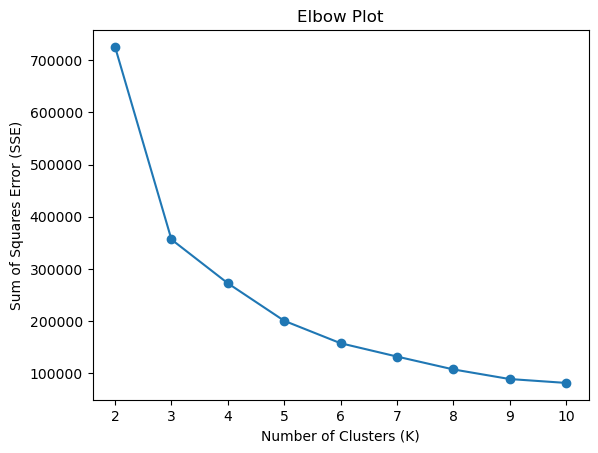

In [20]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Assuming you have your data stored in a numpy array called 'data'
# Make sure your 'data' array contains latitude and longitude values

# Specify the range of K values to test
k_values = range(2, 11)

# Initialize an empty list to store the SSE values
sse_values = []

# Iterate over each K value
for k in k_values:
    # Initialize and fit the K-means model
    kmeans = KMeans(n_clusters=k, random_state=0).fit(target)
    
    # Calculate the SSE
    sse = kmeans.inertia_
    
    # Append the SSE value to the list
    sse_values.append(sse)

# Plot SSE values against K values
plt.plot(k_values, sse_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squares Error (SSE)')
plt.title('Elbow Plot')
plt.show()


In [21]:
kmeans = KMeans(n_clusters = 5, random_state = 0)

kmeans.fit(target)


print("Coordinates of cluster centers: \n", kmeans.cluster_centers_)
print("\nLabel of each point: \n", kmeans.labels_)
print("\nNumber of iterations run: ", kmeans.n_iter_)

C:\Users\Mackhem\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Mackhem\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Coordinates of cluster centers: 
 [[   5.97218533   41.94617853]
 [ -15.84210807 -164.35100116]
 [   9.62003573  -69.14907131]
 [  39.84178493    7.59405209]
 [   6.47298142  129.70481495]]

Label of each point: 
 [0 3 3 1 3 0 2 4 2 2 0 2 4 3 0 2 0 4 2 3 3 2 3 2 4 2 3 0 0 2 0 2 4 3 3 0 4
 0 2 3 2 2 0 0 2 4 4 4 2 0 0 0 1 2 3 2 2 3 3 3 3 0 2 2 2 0 2 0 0 3 0 2 3 4
 3 3 2 1 0 0 3 2 3 3 3 3 3 2 2 4 2 3 3 3 2 2 0 2 4 3 3 0 4 0 0 3 3 0 3 2 4
 3 0 0 0 1 0 0 4 3 0 0 3 3 3 3 3 4 3 0 0 4 0 3 3 4 2 3 0 0 2 4 3 3 4 3 2 3
 0 4 0 4 0 3 4 4 2 3 3 1 4 4 4 3 0 0 4 0 2 4 2 2 4 1 3 3 2 0 3 4 0 0 1 3 0
 3 3 0 3 4 2 3 3 4 0 0 2 4 0 3 0 2 0 2 2 2 2 2 0 2 3 0 3 3 0 0 4 0 0 4 4 3
 1 1 2 3 3 0 2 4 4 2 3 2 0 3 0 2 0 4 3 2 4 1 3 0 0 0 3]

Number of iterations run:  8


In [23]:
y_kmeans = kmeans.fit_predict(target)
y_kmeans

C:\Users\Mackhem\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Mackhem\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 3, 3, 1, 3, 0, 2, 4, 2, 2, 0, 2, 4, 3, 0, 2, 0, 4, 2, 3, 3, 2,
       3, 2, 4, 2, 3, 0, 0, 2, 0, 2, 4, 3, 3, 0, 4, 0, 2, 3, 2, 2, 0, 0,
       2, 4, 4, 4, 2, 0, 0, 0, 1, 2, 3, 2, 2, 3, 3, 3, 3, 0, 2, 2, 2, 0,
       2, 0, 0, 3, 0, 2, 3, 4, 3, 3, 2, 1, 0, 0, 3, 2, 3, 3, 3, 3, 3, 2,
       2, 4, 2, 3, 3, 3, 2, 2, 0, 2, 4, 3, 3, 0, 4, 0, 0, 3, 3, 0, 3, 2,
       4, 3, 0, 0, 0, 1, 0, 0, 4, 3, 0, 0, 3, 3, 3, 3, 3, 4, 3, 0, 0, 4,
       0, 3, 3, 4, 2, 3, 0, 0, 2, 4, 3, 3, 4, 3, 2, 3, 0, 4, 0, 4, 0, 3,
       4, 4, 2, 3, 3, 1, 4, 4, 4, 3, 0, 0, 4, 0, 2, 4, 2, 2, 4, 1, 3, 3,
       2, 0, 3, 4, 0, 0, 1, 3, 0, 3, 3, 0, 3, 4, 2, 3, 3, 4, 0, 0, 2, 4,
       0, 3, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 3, 0, 3, 3, 0, 0, 4, 0, 0, 4,
       4, 3, 1, 1, 2, 3, 3, 0, 2, 4, 4, 2, 3, 2, 0, 3, 0, 2, 0, 4, 3, 2,
       4, 1, 3, 0, 0, 0, 3])

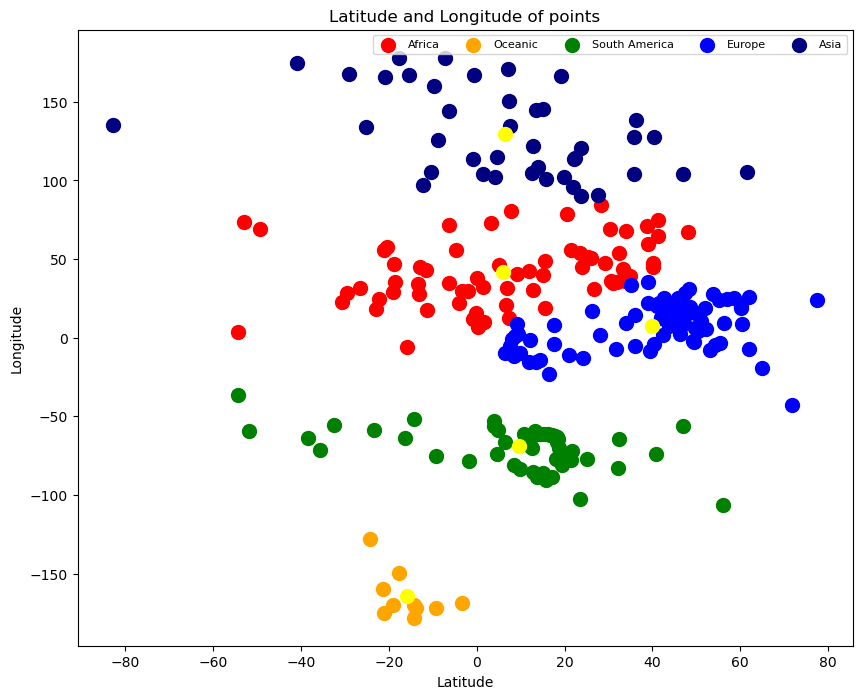

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize =(10,8))

cluster0 = plt.scatter(target.iloc[y_kmeans == 0,0], target.iloc[y_kmeans == 0,1], s = 100, \
                       c = 'red', label = 'Cluster 1')
cluster1 = plt.scatter(target.iloc[y_kmeans == 1,0], target.iloc[y_kmeans == 1,1], s = 100, \
                       c = 'orange', label = 'Cluster 21')
cluster2 = plt.scatter(target.iloc[y_kmeans == 2,0], target.iloc[y_kmeans == 2,1], s = 100, \
                       c = 'green', label = 'Cluster 3')
cluster3 = plt.scatter(target.iloc[y_kmeans == 3,0], target.iloc[y_kmeans == 3,1], s = 100, \
                       c = 'blue', label = 'Cluster 4')
cluster4 = plt.scatter(target.iloc[y_kmeans == 4,0], target.iloc[y_kmeans == 4,1], s = 100, \
                       c = 'navy', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100,\
           c = 'yellow', label = 'Centroids')

plt.legend((cluster0, cluster1, cluster2, cluster3, cluster4),
          ('Africa', 'Oceanic', 'South America', 'Europe', 'Asia'),
          scatterpoints = 1,
          loc = 'upper right',
          ncol = 5,
          fontsize = 8)

plt.title("Latitude and Longitude of points")

plt.xlabel('Latitude')

plt.ylabel('Longitude')

plt.show()

In [25]:
print(kmeans.cluster_centers_[:, 0])
print(kmeans.cluster_centers_[:, 1])

[  5.97218533 -15.84210807   9.62003573  39.84178493   6.47298142]
[  41.94617853 -164.35100116  -69.14907131    7.59405209  129.70481495]


In [31]:
import time
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import pycountry_convert as pc

geolocator = Nominatim(user_agent="http")

centroidsLat = kmeans.cluster_centers_[:,0]
centroidsLong = kmeans.cluster_centers_[:,1]


for latitude,longitude in zip(centroidsLat,centroidsLong):
    try:
        #location = geolocator.reverse((row['latitude'], row['longitude']))
        location = geolocator.reverse((latitude, longitude))
        address = location.raw['address']
        country_code = address.get('country_code').upper()
        continent = pc.country_alpha2_to_continent_code(country_code)
        print(continent)
    except:
        url = f"http://api.geonames.org/oceanJSON?lat={latitude}&lng={longitude}&username=abilimckl1"
        #url = f"http://api.geonames.org/oceanJSON?lat=39.84178493&lng=7.59405209&username=abilimckl1"
        response = requests.get(url)
        data = response.json()
        if response.status_code == 200:
            # Extract the continent name from the API responseocean = data.get('ocean')
            ocean_name = data['ocean']['name']
            #print(ocean_name)
            continent = get_continent(ocean_name)
            print(continent)
        else:
            print("Error:", response.status_code)



AF
OC
SA
EU
AS


In [29]:
def get_continent(ocean_name):
    ocean_to_continent = {
        "Arctic Ocean": "AN",
        "Southern Ocean": "AN",
        "Indian Ocean": "AS",
        "Atlantic Ocean": "AF",
        "South Pacific Ocean": "OC",
        "North Pacific Ocean": "AS",
        "Mediterranean Sea, Western Basin": "EU",
        "Philippine Sea": "AS"
    }
    
    continent = ocean_to_continent.get(ocean_name)
    return continent

In [ ]:
# import time
# from geopy.geocoders import Nominatim
# from geopy.exc import GeocoderTimedOut
# import pycountry_convert as pc

# geolocator = Nominatim(user_agent="http")

# for index, row in df.iterrows():
#     location = geolocator.reverse((row['latitude'], row['longitude']))
#     try:
#         address = location.raw['address']
#         country_code = address.get('country_code').upper()
#         continent = pc.country_alpha2_to_continent_code(country_code)
#         df.at[index, 'continent'] = continent
#     except:
#         df.at[index, 'continent'] = 'NA'

In [ ]:
# import requests

# for index, row in df.iterrows():    
#     # Make an HTTP GET request to the GeoNames API
#     url = f"http://api.geonames.org/countryCodeJSON?lat={row['latitude']}&lng={row['longitude']}&username=abilimckl1"
#     response = requests.get(url)
#     data = response.json()

#     # Check if the request was successful (status code 200)
#     if response.status_code == 200 or data.get('countryCode')!='NoneType' :
#         # Extract the continent name from the API response
#         print(index)
#         countrycode = data.get('countryCode', None).upper()
#         continent_code = pc.country_alpha2_to_continent_code(countrycode)
#         df.at[index, 'continent'] = continent_code
#     else:
#         print("Error:", response.status_code)

In [ ]:
# from geopy.geocoders import Nominatim

# def get_continent(latitude, longitude):
#     geolocator = Nominatim(user_agent="continent_locator")
#     location = geolocator.reverse([latitude, longitude], exactly_one=True)
#     address = location.raw['address']
#     country = address.get('country_code').upper()
#     continent = 
#     return continent

# # Example usage
# latitude = 40.7128  # Example latitude (New York City)
# longitude = -74.0060  # Example longitude (New York City)
# continent = get_continent(latitude, longitude)
# print("Continent:", continent)

# Agglomerative

In [74]:
# Import hierarchical clustering library
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestCentroid

# Create AgglomerativeClustering object
ag = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'complete')
ag.fit(target)
# Print the cluster label of each data point
print("Label of each point: ", ag.labels_)

Label of each point:  [1 5 5 0 5 1 0 2 0 3 1 0 2 5 1 0 1 1 0 5 5 0 5 0 1 3 5 1 3 3 1 0 4 5 5 1 4
 1 0 5 0 0 1 1 3 4 4 4 0 1 1 1 0 0 5 0 0 1 5 5 5 1 0 0 0 1 0 1 1 5 1 3 5 2
 5 5 0 0 2 1 5 0 5 5 5 5 5 0 0 2 0 5 5 5 0 0 2 0 4 5 5 1 4 1 1 5 5 1 5 0 4
 5 1 1 1 0 1 1 4 5 1 1 5 5 5 5 5 4 5 1 1 4 1 5 5 2 0 5 1 1 0 2 5 5 4 5 0 5
 1 4 1 2 1 5 2 2 0 5 1 0 2 4 2 5 1 1 2 1 0 2 3 0 4 0 5 5 0 1 5 4 1 1 0 5 1
 5 5 1 5 4 0 5 5 2 1 1 3 4 1 5 1 0 1 0 0 0 0 0 1 0 5 1 5 5 1 1 4 1 1 4 2 5
 0 0 0 5 1 1 0 2 2 0 5 0 1 5 1 3 1 2 5 0 4 0 5 1 1 1 5]


C:\Users\Mackhem\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [78]:
# Save new clusters for plot
y_hc = ag.fit_predict(target)
y_hc

clf = NearestCentroid()
clf.fit(target,y_hc)
print(clf.centroids_)


[[ 11.157042   -87.15281451]
 [ 10.35922026  42.25993531]
 [-14.85029009 147.64816851]
 [-35.69203417 -50.84981259]
 [ 19.46841467 110.80937267]
 [ 40.43812664   6.4273685 ]]


C:\Users\Mackhem\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


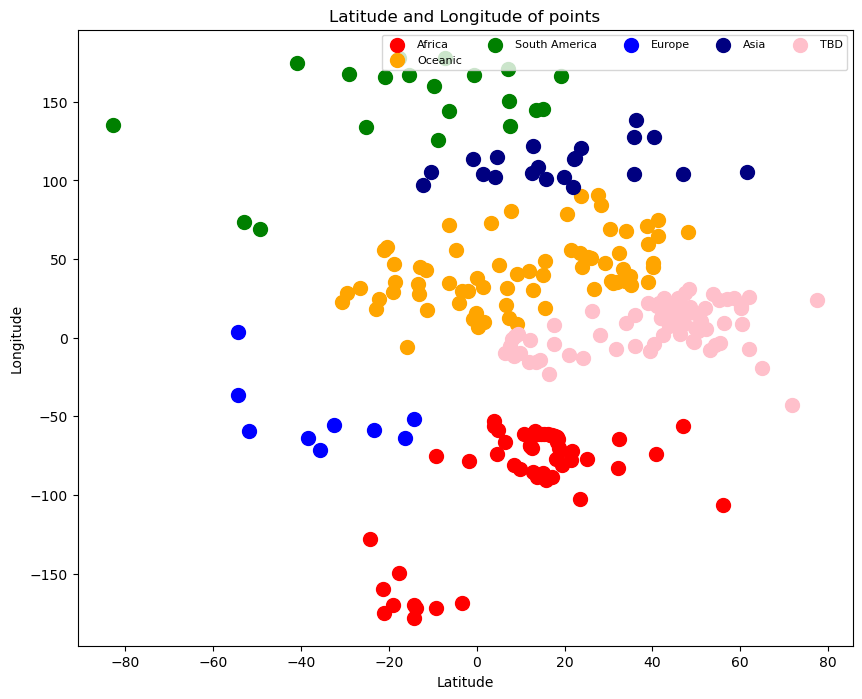

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize =(10,8))

cluster0 = plt.scatter(target.iloc[y_hc == 0,0], target.iloc[y_hc == 0,1], s = 100, \
                       c = 'red', label = 'Cluster 1')
cluster1 = plt.scatter(target.iloc[y_hc == 1,0], target.iloc[y_hc == 1,1], s = 100, \
                       c = 'orange', label = 'Cluster 21')
cluster2 = plt.scatter(target.iloc[y_hc == 2,0], target.iloc[y_hc == 2,1], s = 100, \
                       c = 'green', label = 'Cluster 3')
cluster3 = plt.scatter(target.iloc[y_hc == 3,0], target.iloc[y_hc == 3,1], s = 100, \
                       c = 'blue', label = 'Cluster 4')
cluster4 = plt.scatter(target.iloc[y_hc == 4,0], target.iloc[y_hc == 4,1], s = 100, \
                       c = 'navy', label = 'Cluster 5')
cluster5 = plt.scatter(target.iloc[y_hc == 5,0], target.iloc[y_hc == 5,1], s = 100, \
                       c = 'pink', label = 'Cluster 6')

plt.legend((cluster0, cluster1, cluster2, cluster3, cluster4, cluster5),
          ('Africa', 'Oceanic', 'South America', 'Europe', 'Asia', 'TBD'),
          scatterpoints = 1,
          loc = 'upper right',
          ncol = 5,
          fontsize = 8)

plt.title("Latitude and Longitude of points")

plt.xlabel('Latitude')

plt.ylabel('Longitude')

plt.show()